<a href="https://colab.research.google.com/github/Srinivas1490/AIML-2025/blob/main/2303A51490_10_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("https://drive.google.com/uc?id=1g9uBAJbMwt7rBXQcVn3vAQornMBjpdDe&export=download", delimiter=";")
data.columns
data = data.dropna(axis=1, how="all")

In [3]:
data.columns = [
    "Date", "Time", "CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)",
    "PT08.S2(NMHC)", "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)", "PT08.S4(NO2)",
    "PT08.S5(O3)", "Temperature", "RH", "AH"
]

In [4]:
top_reasons = data["CO(GT)"].value_counts().head(5)
print("Top 5 reasons for air quality issues:")
print(top_reasons)

Top 5 reasons for air quality issues:
CO(GT)
-200    1592
1,4      279
1,6      275
1,5      273
1,1      262
Name: count, dtype: int64


In [5]:
data["Date"] = pd.to_datetime(data["Date"], format="%d/%m/%Y")
data["Day_of_Week"] = data["Date"].dt.day_name()
day_with_issues = data["Day_of_Week"].value_counts().idxmax()
print(f"Day of the week with most air quality issues: {day_with_issues}")

Day of the week with most air quality issues: Thursday


<ipython-input-5-426615fddc1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"] = pd.to_datetime(data["Date"], format="%d/%m/%Y")
<ipython-input-5-426615fddc1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Day_of_Week"] = data["Date"].dt.day_name()


In [7]:
data["CO(GT)"] = data["CO(GT)"].astype(str).str.replace(",", ".").replace("nan", None).astype(float)
data["Temperature"] = data["Temperature"].astype(str).str.replace(",", ".").replace("nan", None).astype(float)
max_quality = data["CO(GT)"].max()
min_quality = data["CO(GT)"].min()
print(f"Max air quality level: {max_quality}")
print(f"Min air quality level: {min_quality}")

Max air quality level: 11.9
Min air quality level: -200.0


In [8]:
max_temp = data.loc[data["CO(GT)"].idxmax(), "Temperature"]
min_temp = data.loc[data["CO(GT)"].idxmin(), "Temperature"]
print(f"Highest temperature of max air quality: {max_temp}")
print(f"Lowest temperature of min air quality: {min_temp}")

Highest temperature of max air quality: 12.4
Lowest temperature of min air quality: 10.1


In [9]:
# Replace commas with dots and convert to float


# Check for conversion success
print(data[["CO(GT)", "Temperature"]].head())

# Select features for scaling
features = data[["CO(GT)", "Temperature"]]

# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print("Scaled Features:")
print(scaled_features)


   CO(GT)  Temperature
0     2.6         13.6
1     2.0         13.3
2     2.2         11.9
3     2.2         11.0
4     1.6         11.2
Scaled Features:
[[0.4739999  0.08846247]
 [0.46627322 0.08151824]
 [0.46884878 0.04911182]
 ...
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]


In [10]:
data["CO(GT)"] = data["CO(GT)"].fillna(data["CO(GT)"].mean())  # Replace NaNs with mean
data["Temperature"] = data["Temperature"].fillna(data["Temperature"].mean())  # Replace NaNs with mean

# Scale the features again after handling NaNs
features = data[["CO(GT)", "Temperature"]]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
data["Cluster"] = kmeans.fit_predict(scaled_features)


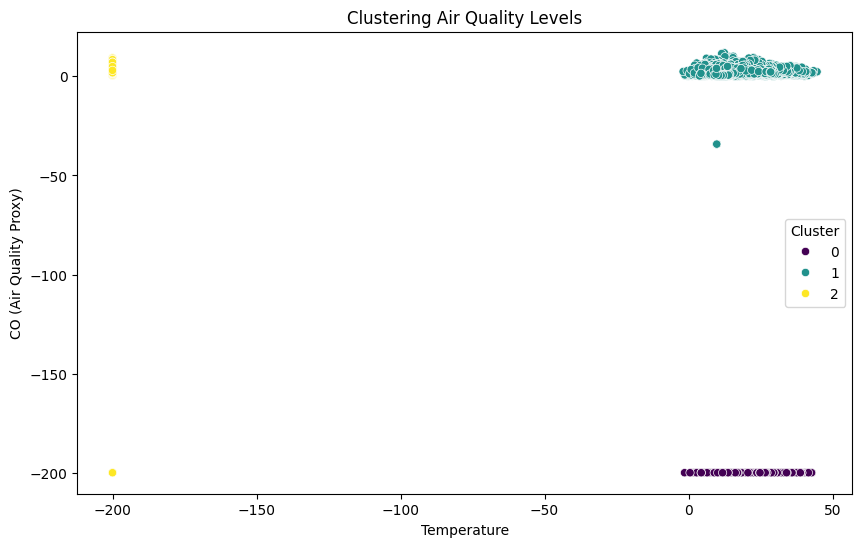

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data["Temperature"],
    y=data["CO(GT)"],
    hue=data["Cluster"],
    palette="viridis"
)
plt.title("Clustering Air Quality Levels")
plt.xlabel("Temperature")
plt.ylabel("CO (Air Quality Proxy)")
plt.legend(title="Cluster")
plt.show()